In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

**Load Iris DataSet**

In [5]:
col = ["Sepal Length","Sepal Width","Petal Length","Petal Width","Class_Label"]
Iris_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/IRIS.csv")
Iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
Iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


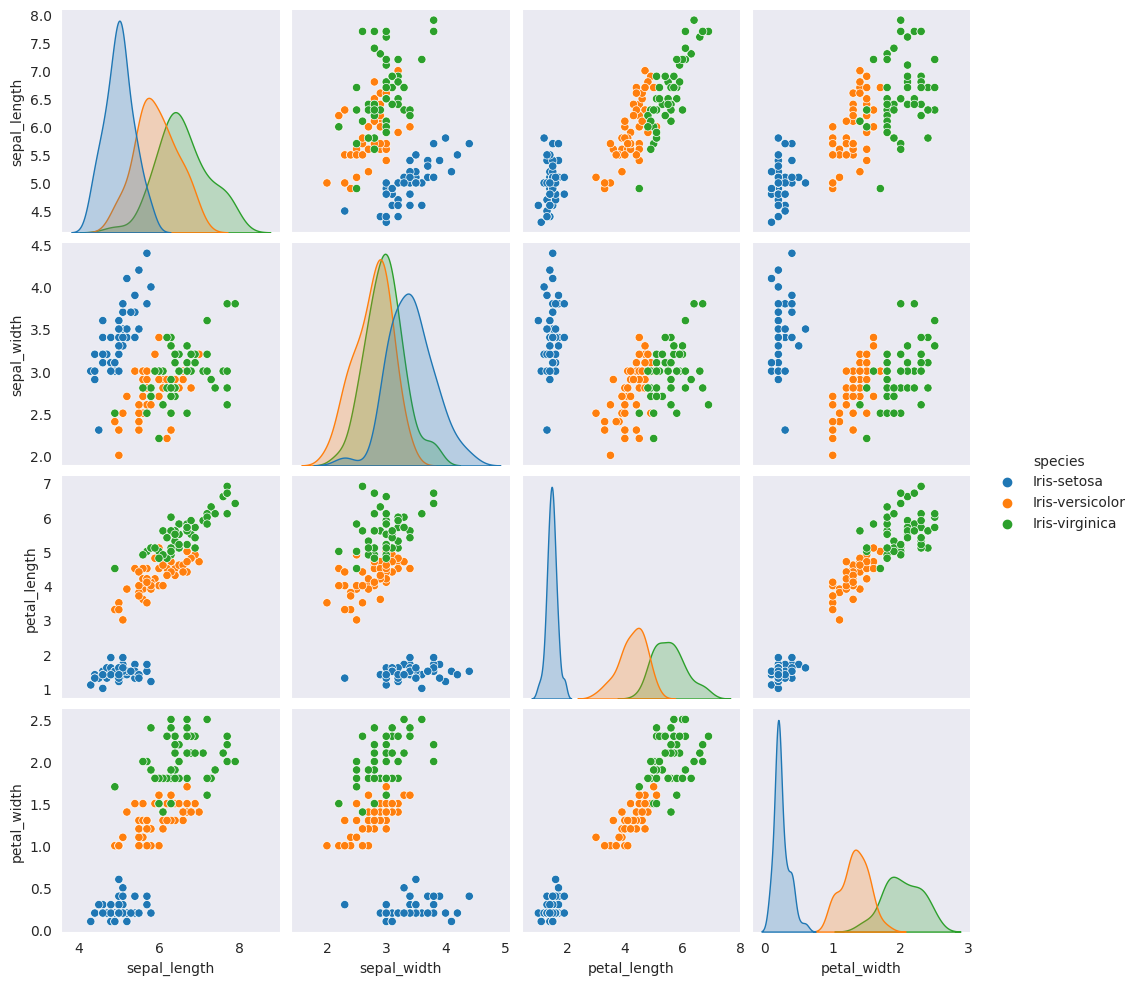

In [8]:
sns.set_style("dark")
sns.pairplot(Iris_df,hue="species")

<ipython-input-10-8e2b13578f81>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Iris_df.hist(ax=ax)


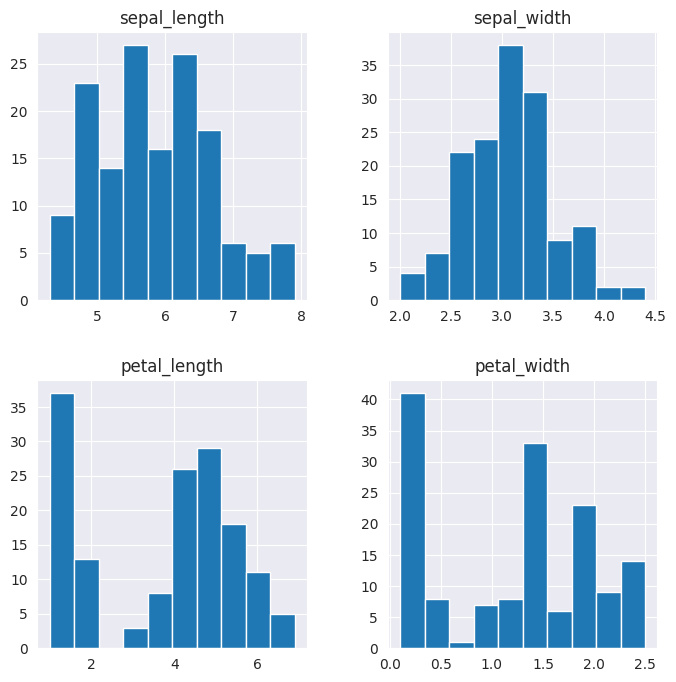

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
Iris_df.hist(ax=ax)
plt.show()

Text(0.5, 1.0, 'Box Plot of Petal Width')

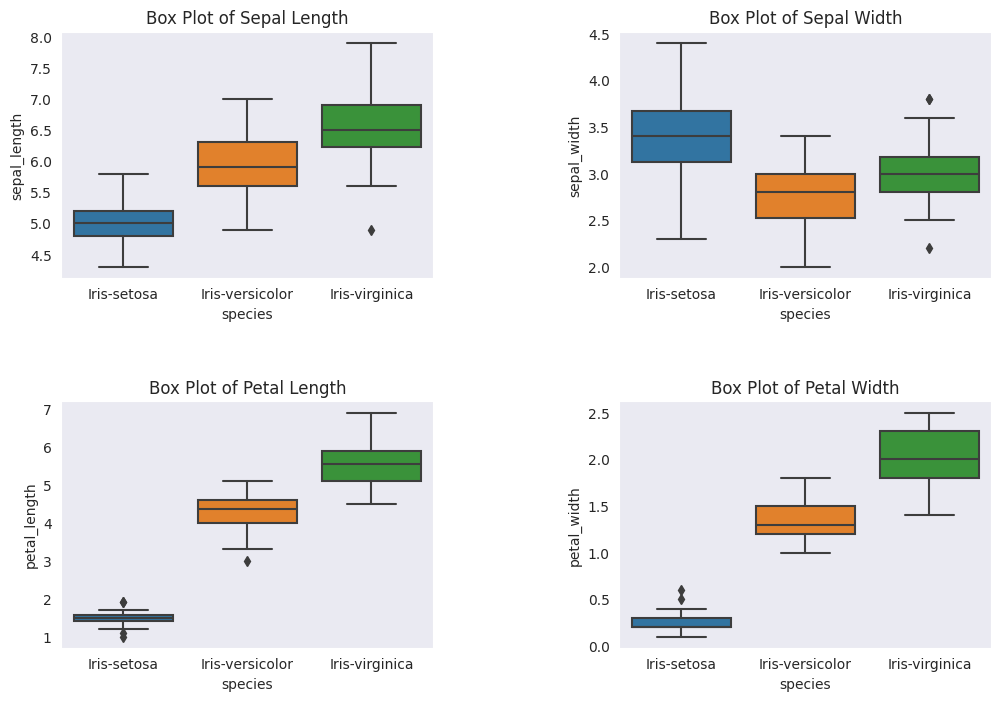

In [14]:
plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5)
plt.subplot(gs[0])
sns.boxplot(x="species",y="sepal_length",data=Iris_df)
plt.title("Box Plot of Sepal Length")

plt.subplot(gs[1])
sns.boxplot(x="species",y="sepal_width",data=Iris_df)
plt.title("Box Plot of Sepal Width")

plt.subplot(gs[2])
sns.boxplot(x="species",y="petal_length",data=Iris_df)
plt.title("Box Plot of Petal Length")

plt.subplot(gs[3])
sns.boxplot(x="species",y="petal_width",data=Iris_df)
plt.title("Box Plot of Petal Width")



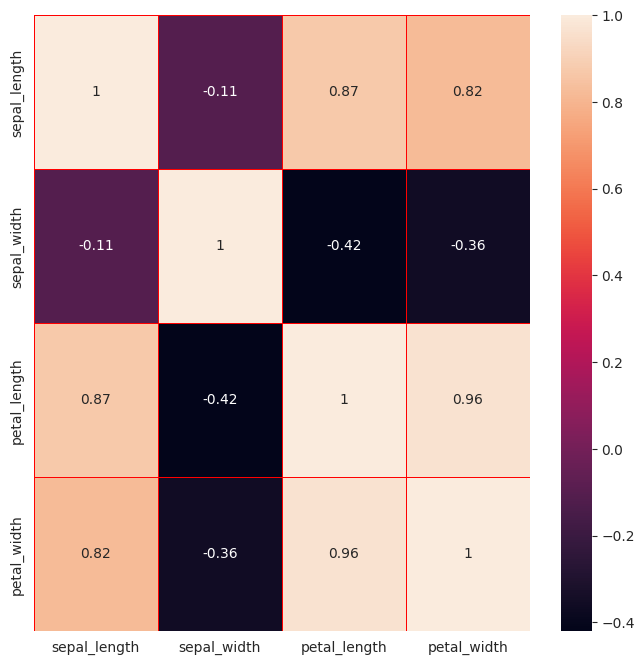

In [19]:
plt.figure(figsize=(8,8))
Iris_corr = Iris_df.iloc[:,:4]
sns.heatmap(Iris_corr.corr(),annot=True,linecolor="red",linewidths=0.5)
plt.show()

**Selecting And Training Model**

In [20]:
#Splitting Features and Label
data = Iris_df.values
X = data[:,0:4]
Y = data[:,4]
print("Features Values:\n",X)
print("Labels:\n",Y)

Features Values:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

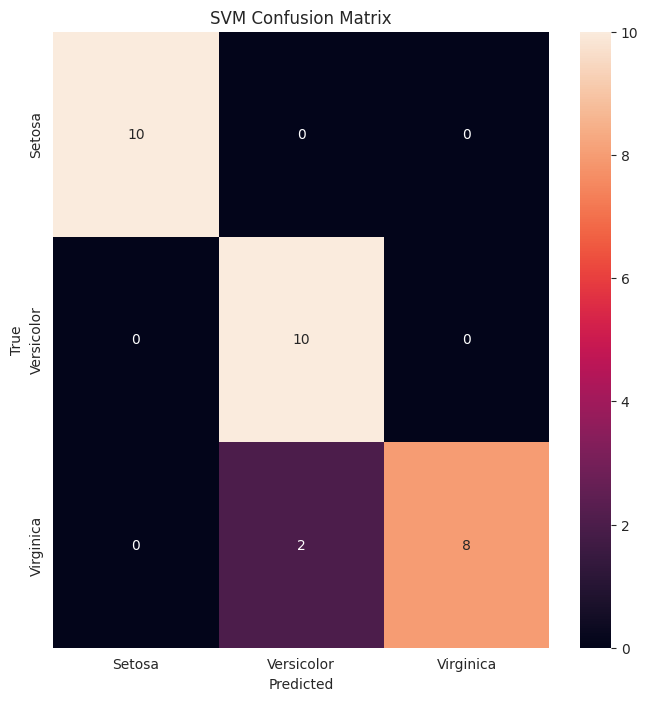

SVM Results : 
Accuracy : 0.9333333333333333
Classification Report :
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.83      1.00      0.91        10
   Virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



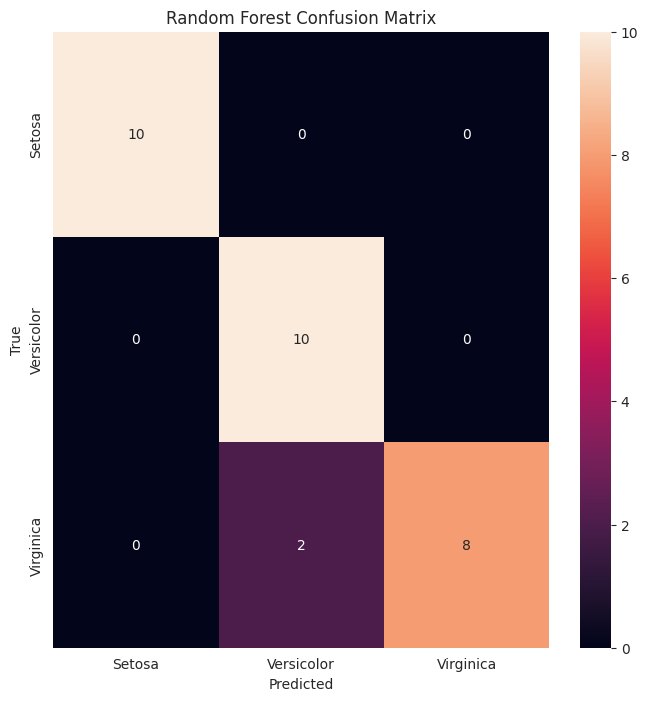

Random Forest Results : 
Accuracy : 0.9333333333333333
Classification Report :
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.83      1.00      0.91        10
   Virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



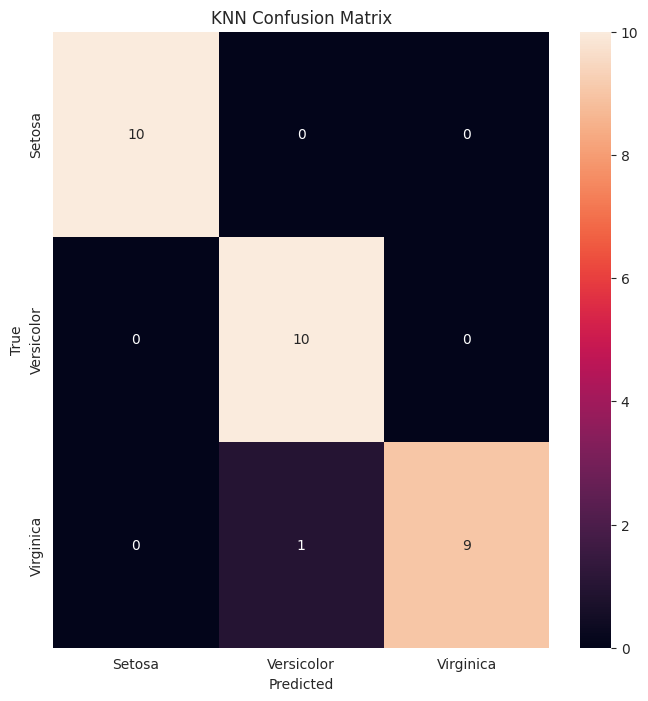

KNN Results : 
Accuracy : 0.9666666666666667
Classification Report :
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
classifiers = {
    'SVM' : SVC(),
    'Random Forest' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier()
}
classes = ["Setosa","Versicolor","Virginica"]
for clf_name,clf in classifiers.items() :
  clf.fit(X_train,Y_train)
  y_predict = clf.predict(X_test)
  cm = confusion_matrix(Y_test,y_predict)

  plt.figure(figsize=(8,8))
  sns.heatmap(cm,annot=True,fmt='d',xticklabels=classes,yticklabels=classes)
  plt.title(f"{clf_name} Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

  accuracy = accuracy_score(Y_test,y_predict)
  report = classification_report(Y_test,y_predict,target_names=classes)
  print(f"{clf_name} Results : ")
  print(f"Accuracy : {accuracy}")
  print(f"Classification Report :\n {report}")


**Model Deployment**

In [27]:
best_clf = KNeighborsClassifier()
best_clf.fit(X_train,Y_train)
best_accuracy = accuracy_score(Y_test,best_clf.predict(X_test))
print(f"Accuracy : {best_accuracy}")

#Save Model
from joblib import dump
Model_Path = "/content/drive/MyDrive/Colab Notebooks/data/IrisModel.pkl"
dump(best_clf,Model_Path)


Accuracy : 0.9666666666666667


['/content/drive/MyDrive/Colab Notebooks/data/IrisModel.pkl']